Raw data (first few rows):
                 0                1                            2  \
0  Chiral indice n  Chiral indice m  Initial atomic coordinate u   
1                2                1                     0,679005   
2                2                1                     0,717298   
3                2                1                     0,489336   
4                2                1                     0,413957   

                             3                            4  \
0  Initial atomic coordinate v  Initial atomic coordinate w   
1                     0,701318                     0,017033   
2                     0,642129                     0,231319   
3                     0,303751                     0,088462   
4                     0,632996                     0,040843   

                                  5                                 6  \
0  Calculated atomic coordinates u'  Calculated atomic coordinates v'   
1                          0,721039    

/tmp/ipykernel_17/3575031666.py:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: str(x).strip() if isinstance(x, str) else x)


Count of NaN values in each column:
Chiral Indice n                    1
Chiral Indice m                    1
Initial Atomic Coordinate u        1
Initial Atomic Coordinate v        1
Initial Atomic Coordinate w        1
Calculated Atomic Coordinate u'    1
Calculated Atomic Coordinate v'    1
Calculated Atomic Coordinate w'    1
dtype: int64
Clean data summary:
       Chiral Indice n  Chiral Indice m  Initial Atomic Coordinate u  \
count     10721.000000     10721.000000                 10721.000000   
mean          8.225725         3.337189                454784.941610   
std           2.138919         1.683881                304380.714928   
min           2.000000         1.000000                   158.000000   
25%           7.000000         2.000000                156502.000000   
50%           8.000000         3.000000                431087.000000   
75%          10.000000         5.000000                756414.000000   
max          12.000000         6.000000                9548

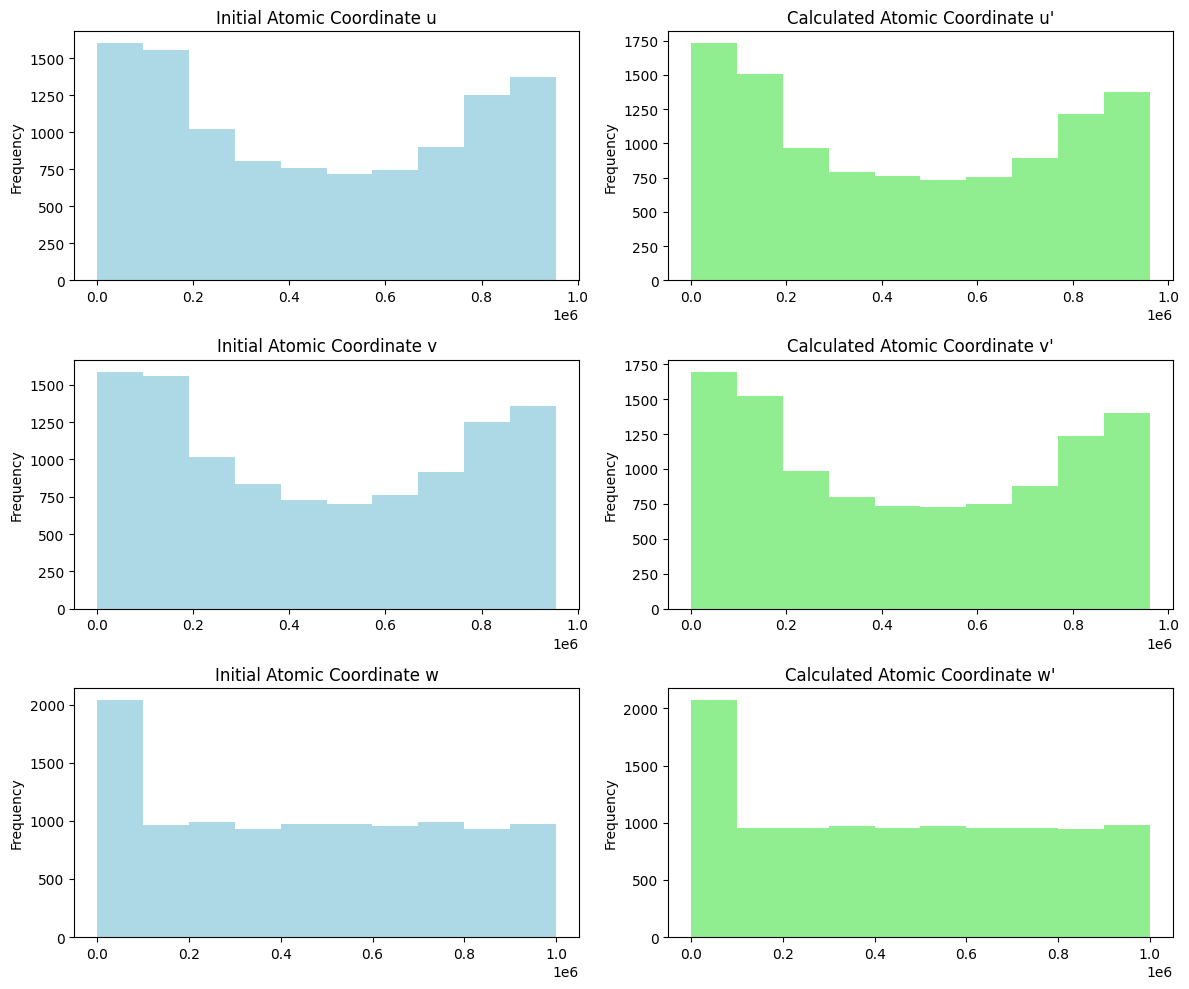

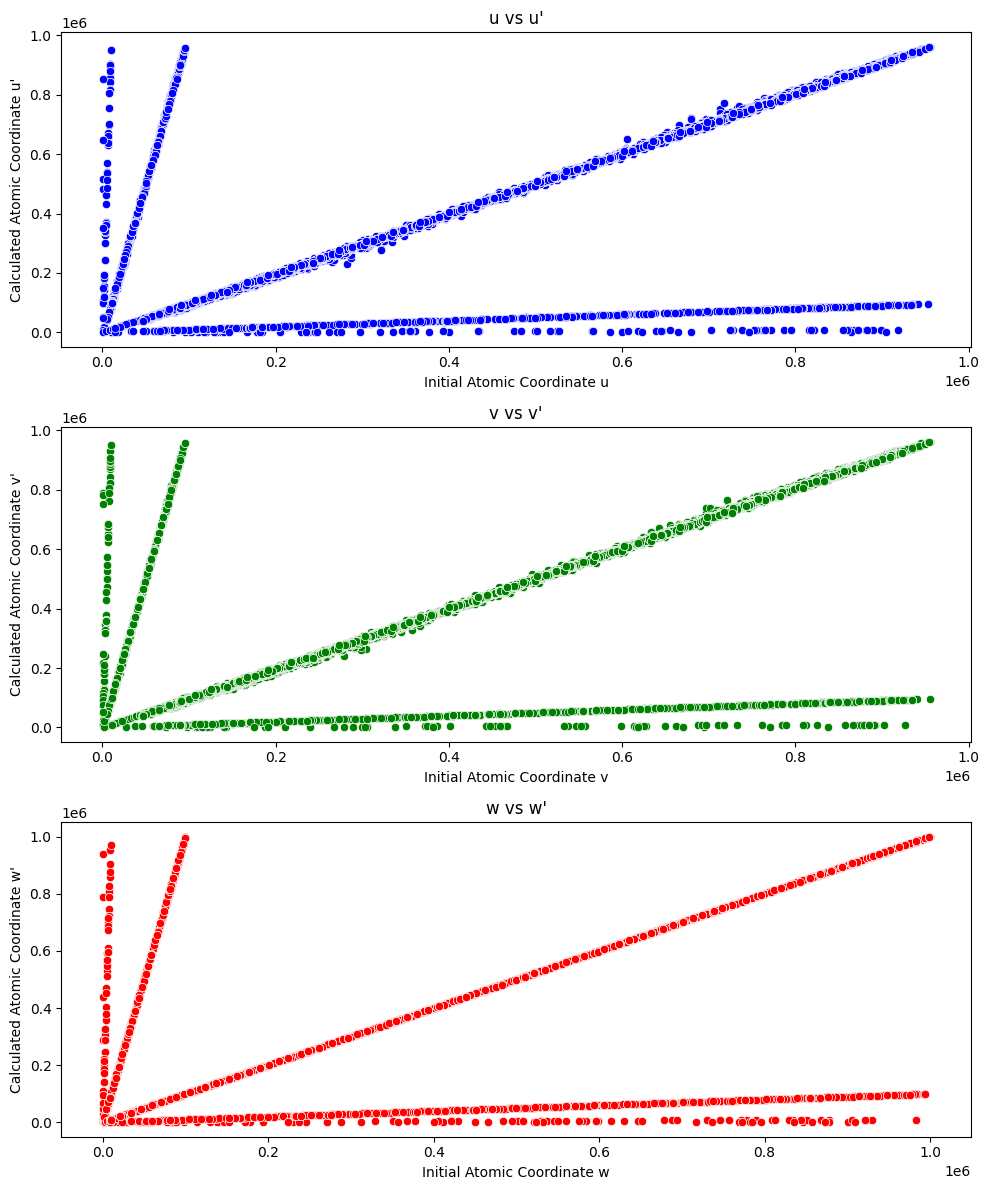

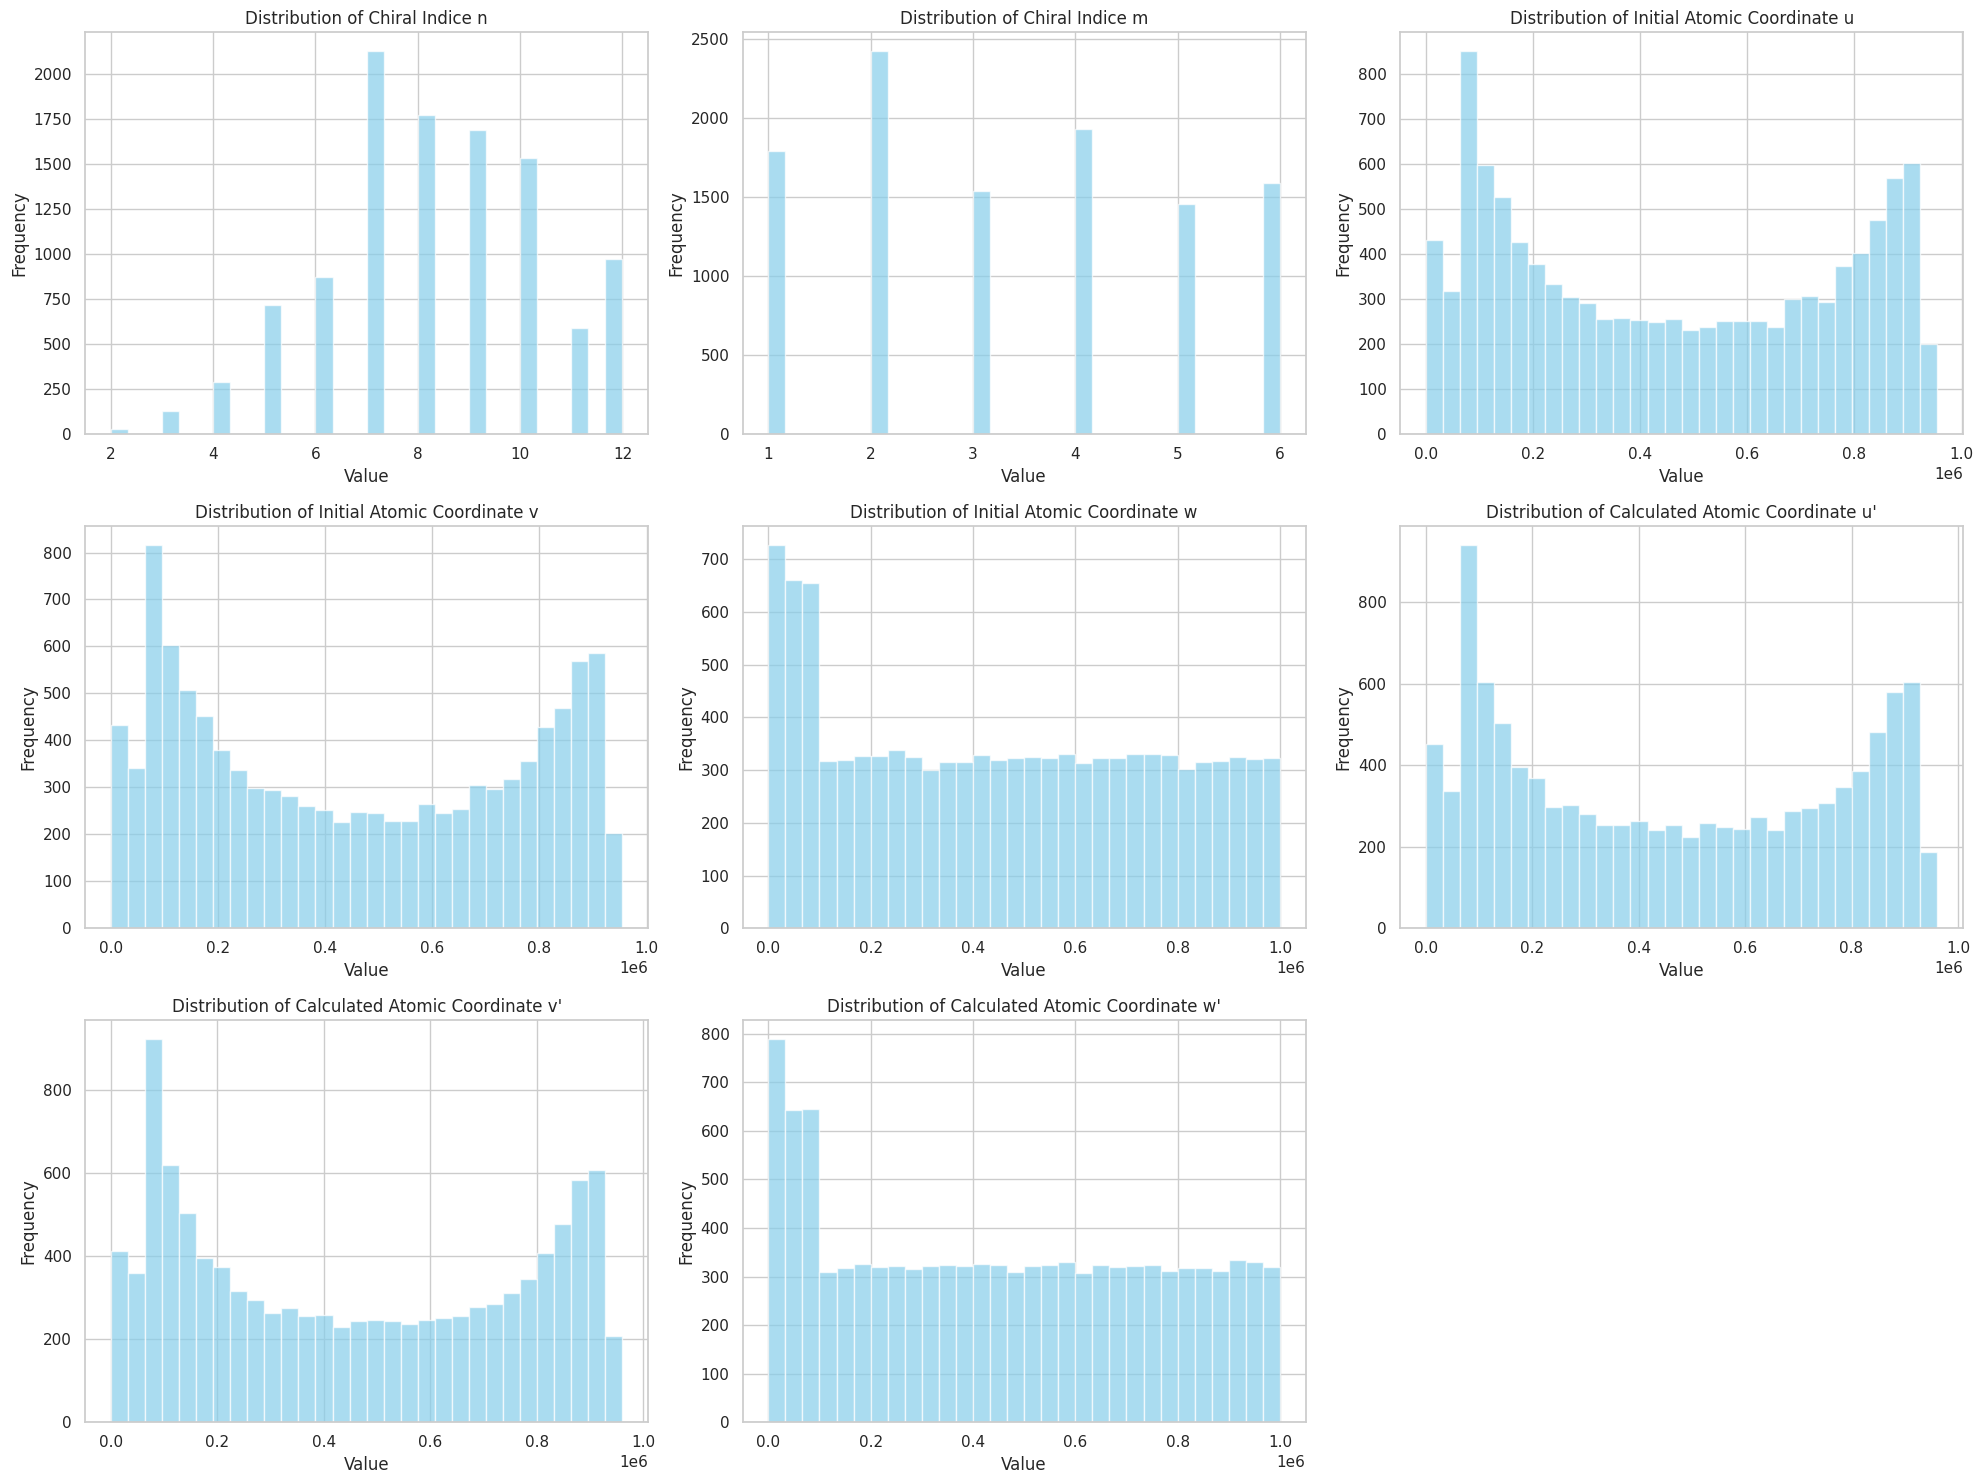

In [1]:
import pandas as pd
import numpy as np

# Load the dataset and inspect the first few rows
file_path = '/kaggle/input/carbon-nanotubes/carbon_nanotubes.csv'  # Update with the correct path

# Load the raw dataset
data = pd.read_csv(file_path, sep=';', header=None)

# Inspect the first few rows
print("Raw data (first few rows):")
print(data.head())

# Rename columns after inspecting
columns = ['Chiral Indice n', 'Chiral Indice m', 'Initial Atomic Coordinate u', 'Initial Atomic Coordinate v', 
           'Initial Atomic Coordinate w', 'Calculated Atomic Coordinate u\'', 'Calculated Atomic Coordinate v\'', 
           'Calculated Atomic Coordinate w\'']
data.columns = columns

# Strip any leading/trailing whitespace or unwanted characters in string columns (e.g., if numbers are improperly formatted)
data = data.applymap(lambda x: str(x).strip() if isinstance(x, str) else x)

# Convert to numeric, but first ensure there are no formatting issues (e.g., commas, invalid characters)
# Remove any problematic characters
for col in columns:
    data[col] = data[col].replace({',': '', ' ': ''}, regex=True)

# Now try converting all relevant columns to numeric values, forcing errors to NaN
numeric_columns = ['Chiral Indice n', 'Chiral Indice m', 'Initial Atomic Coordinate u', 'Initial Atomic Coordinate v', 
                   'Initial Atomic Coordinate w', 'Calculated Atomic Coordinate u\'', 
                   'Calculated Atomic Coordinate v\'', 'Calculated Atomic Coordinate w\'']

data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Check for NaN values after attempting numeric conversion
print("Count of NaN values in each column:")
print(data.isna().sum())

# Drop rows with NaN values in any of the numeric columns
clean_data = data.dropna(subset=numeric_columns)

# Inspect clean data summary statistics
print("Clean data summary:")
print(clean_data.describe())

# 1. Distribution Analysis (Histograms)
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 2, figsize=(12, 10))

# Plot histograms for Initial and Calculated Atomic Coordinates
clean_data['Initial Atomic Coordinate u'].plot(kind='hist', ax=axes[0, 0], title='Initial Atomic Coordinate u', color='lightblue')
clean_data['Calculated Atomic Coordinate u\''].plot(kind='hist', ax=axes[0, 1], title='Calculated Atomic Coordinate u\'', color='lightgreen')

clean_data['Initial Atomic Coordinate v'].plot(kind='hist', ax=axes[1, 0], title='Initial Atomic Coordinate v', color='lightblue')
clean_data['Calculated Atomic Coordinate v\''].plot(kind='hist', ax=axes[1, 1], title='Calculated Atomic Coordinate v\'', color='lightgreen')

clean_data['Initial Atomic Coordinate w'].plot(kind='hist', ax=axes[2, 0], title='Initial Atomic Coordinate w', color='lightblue')
clean_data['Calculated Atomic Coordinate w\''].plot(kind='hist', ax=axes[2, 1], title='Calculated Atomic Coordinate w\'', color='lightgreen')

plt.tight_layout()
plt.show()

# 2. Scatter Plot Analysis (for u, v, w vs u', v', w')
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

sns.scatterplot(x=clean_data['Initial Atomic Coordinate u'], y=clean_data['Calculated Atomic Coordinate u\''], ax=axes[0], color='blue')
axes[0].set_title('u vs u\'')
sns.scatterplot(x=clean_data['Initial Atomic Coordinate v'], y=clean_data['Calculated Atomic Coordinate v\''], ax=axes[1], color='green')
axes[1].set_title('v vs v\'')
sns.scatterplot(x=clean_data['Initial Atomic Coordinate w'], y=clean_data['Calculated Atomic Coordinate w\''], ax=axes[2], color='red')
axes[2].set_title('w vs w\'')

plt.tight_layout()
plt.show()

# Set the style for seaborn
sns.set(style='whitegrid')

# Create a figure with subplots
fig, axs = plt.subplots(3, 3, figsize=(20, 15))

# Plot histograms
for i, col in enumerate(columns):
    # Calculate row and column indices
    row = i // 3
    col_index = i % 3
    
    # Histogram
    axs[row, col_index].hist(data[col], bins=30, color='skyblue', alpha=0.7)
    axs[row, col_index].set_title(f'Distribution of {col}')
    axs[row, col_index].set_xlabel('Value')
    axs[row, col_index].set_ylabel('Frequency')

# Remove empty subplot if there are any
if len(columns) < 9:
    fig.delaxes(axs.flatten()[len(columns)])

plt.tight_layout()
plt.show()

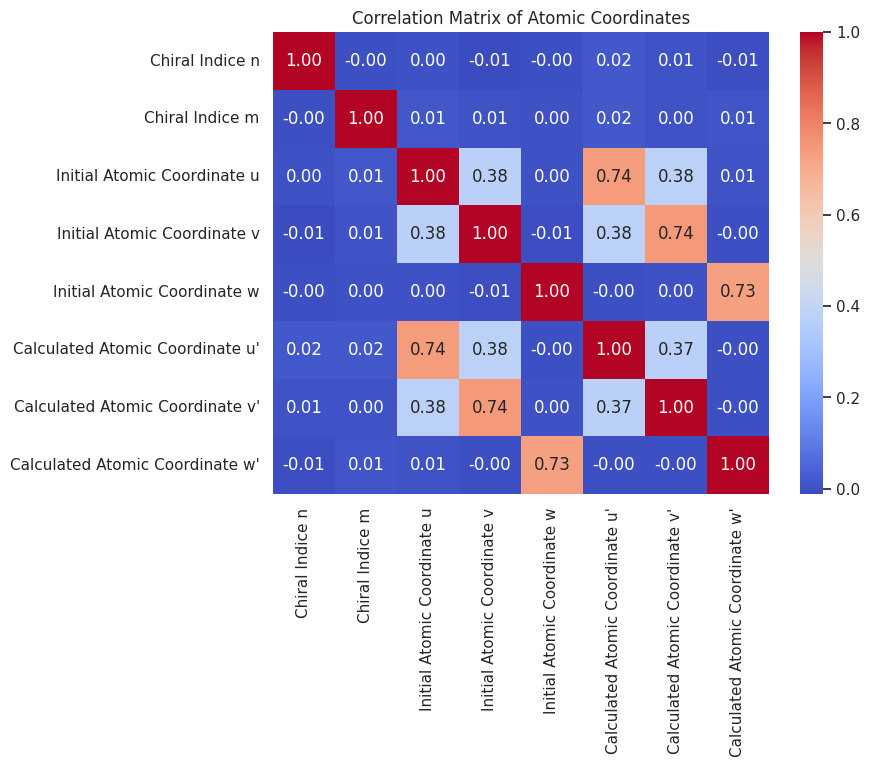

Correlation matrix:
                                 Chiral Indice n  Chiral Indice m  \
Chiral Indice n                         1.000000        -0.001994   
Chiral Indice m                        -0.001994         1.000000   
Initial Atomic Coordinate u             0.003194         0.013356   
Initial Atomic Coordinate v            -0.011677         0.007843   
Initial Atomic Coordinate w            -0.002823         0.001127   
Calculated Atomic Coordinate u'         0.016052         0.017149   
Calculated Atomic Coordinate v'         0.005005         0.004639   
Calculated Atomic Coordinate w'        -0.005349         0.010200   

                                 Initial Atomic Coordinate u  \
Chiral Indice n                                     0.003194   
Chiral Indice m                                     0.013356   
Initial Atomic Coordinate u                         1.000000   
Initial Atomic Coordinate v                         0.375245   
Initial Atomic Coordinate w           

In [2]:
# Clean up any extraneous characters or spaces in the numeric columns
for col in columns:
    data[col] = data[col].replace({',': '', ' ': ''}, regex=True)
    data[col] = pd.to_numeric(data[col], errors='coerce')  # Convert columns to numeric

# Drop rows with NaN values in any of the coordinate columns
clean_data = data.dropna(subset=[
    'Initial Atomic Coordinate u', 'Initial Atomic Coordinate v', 'Initial Atomic Coordinate w',
    'Calculated Atomic Coordinate u\'', 'Calculated Atomic Coordinate v\'', 'Calculated Atomic Coordinate w\''
])

# Calculate the correlation matrix for the relevant coordinates
correlation_matrix = clean_data.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Atomic Coordinates')
plt.show()

# Display the correlation matrix in the console
print("Correlation matrix:")
print(correlation_matrix)

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load the dataset
data = pd.read_csv('/kaggle/input/carbon-nanotubes/carbon_nanotubes.csv')

# 1. Handling Missing Values
# Check for missing values
print("Missing values in each column:\n", data.isnull().sum())

# Fill missing values if any, here we fill with mean but it can be adjusted as needed
data.fillna(data.mean(), inplace=True)

# 2. Encoding Categorical Variables (if any)
# Check if there are any categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    print("Categorical columns found:", categorical_cols)
    # Convert categorical variables to numerical if they exist (for this dataset, there may not be any)
    data = pd.get_dummies(data, columns=categorical_cols)
else:
    print("No categorical columns found.")

# 3. Feature Scaling
# Define features to be scaled (all columns in this case except any identifiers if present)
# StandardScaler or MinMaxScaler can be used based on the need

# Using MinMaxScaler for scaling
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# 4. Splitting Data into Train and Test Sets
# Define feature columns and target column
X = data_scaled  # Features (since it's unsupervised, we use the entire dataset)

# Split the dataset into training and testing
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Display processed data
print("Sample of preprocessed data:\n", X_train.head())

Missing values in each column:
 Chiral indice n;Chiral indice m;Initial atomic coordinate u;Initial atomic coordinate v;Initial atomic coordinate w;Calculated atomic coordinates u';Calculated atomic coordinates v';Calculated atomic coordinates w'    21
dtype: int64
No categorical columns found.
Sample of preprocessed data:
        Chiral indice n;Chiral indice m;Initial atomic coordinate u;Initial atomic coordinate v;Initial atomic coordinate w;Calculated atomic coordinates u';Calculated atomic coordinates v';Calculated atomic coordinates w'
3470                                            0.538344                                                                                                                                                                     
2692                                            0.643882                                                                                                                                                                     
9832    

In [4]:
import pandas as pd

# Load the dataset with ';' as the delimiter
data = pd.read_csv('/kaggle/input/carbon-nanotubes/carbon_nanotubes.csv', delimiter=';', header=None)

# Rename columns according to the expected structure
data.columns = ["Chiral Indice n", "Chiral Indice m", "Initial Atomic Coordinate u", 
                "Initial Atomic Coordinate v", "Initial Atomic Coordinate w", 
                "Calculated Atomic Coordinate u'", "Calculated Atomic Coordinate v'", 
                "Calculated Atomic Coordinate w'"]

# Preview the first few rows before processing
print("Data preview before cleaning:\n", data.head())

# Replace commas with dots for decimal conversion and convert all columns to numeric
for col in data.columns:
    data[col] = data[col].astype(str).str.replace(',', '.', regex=False)  # Change ',' to '.'
    data[col] = pd.to_numeric(data[col], errors='coerce')  # Convert to numeric, coercing errors

# Drop any rows with NaN values
data.dropna(inplace=True)

# Preview data shape after loading and preprocessing
print("Data shape after loading and preprocessing:", data.shape)

# Check for NaN values in each column
nan_counts = data.isna().sum()
print("Number of NaN values in each column:\n", nan_counts)

# Ensure that data is not empty after dropping NaN values
if data.shape[0] == 0:
    print("Warning: No valid data available after preprocessing.")
else:
    # Preview the first few rows of the cleaned data
    print("Data preview after preprocessing:\n", data.head())

    # Separate the target columns
    target_columns = ["Calculated Atomic Coordinate u'", 
                      "Calculated Atomic Coordinate v'", 
                      "Calculated Atomic Coordinate w'"]

    # Check if all target columns are present in the DataFrame
    if all(col in data.columns for col in target_columns):
        targets = data[target_columns]
        features = data.drop(columns=target_columns)  # Drop target columns to create feature set
        print("Feature set shape:", features.shape)
        print("Target set shape:", targets.shape)
    else:
        print("Warning: One or more target columns are missing from the dataset.")

Data preview before cleaning:
    Chiral Indice n  Chiral Indice m  Initial Atomic Coordinate u  \
0  Chiral indice n  Chiral indice m  Initial atomic coordinate u   
1                2                1                     0,679005   
2                2                1                     0,717298   
3                2                1                     0,489336   
4                2                1                     0,413957   

   Initial Atomic Coordinate v  Initial Atomic Coordinate w  \
0  Initial atomic coordinate v  Initial atomic coordinate w   
1                     0,701318                     0,017033   
2                     0,642129                     0,231319   
3                     0,303751                     0,088462   
4                     0,632996                     0,040843   

    Calculated Atomic Coordinate u'   Calculated Atomic Coordinate v'  \
0  Calculated atomic coordinates u'  Calculated atomic coordinates v'   
1                          0,721039

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset
file_path = '/kaggle/input/carbon-nanotubes/carbon_nanotubes.csv'
column_names = [
    'Chiral Indice n', 'Chiral Indice m', 'Initial Atomic Coordinate u',
    'Initial Atomic Coordinate v', 'Initial Atomic Coordinate w',
    'Calculated Atomic Coordinate u\'', 'Calculated Atomic Coordinate v\'', 'Calculated Atomic Coordinate w\''
]
data = pd.read_csv(file_path, sep=';', header=None, names=column_names)

# Data Preprocessing: Clean data (strip whitespaces, replace commas with dots, convert to numeric)
data = data.applymap(lambda x: str(x).strip() if isinstance(x, str) else x)
data[column_names] = data[column_names].replace({',': '', ' ': ''}, regex=True).apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
data.dropna(inplace=True)

# Features and target
X = data[['Initial Atomic Coordinate u', 'Initial Atomic Coordinate v', 'Initial Atomic Coordinate w']]
y = data[['Calculated Atomic Coordinate u\'', 'Calculated Atomic Coordinate v\'', 'Calculated Atomic Coordinate w\'']]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/tmp/ipykernel_17/3547692893.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: str(x).strip() if isinstance(x, str) else x)


In [6]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize results dictionary
results = {}

# 1. Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)
y_pred_lr = model_lr.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

results['Linear Regression'] = {
    'RMSE': rmse_lr,
    'R²': r2_lr
}

# 2. Polynomial Regression (degree 2 and 3)
for degree in [2, 3]:
    model_poly = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('linear', LinearRegression())
    ])
    model_poly.fit(X_train_scaled, y_train)
    y_pred_poly = model_poly.predict(X_test_scaled)
    mse_poly = mean_squared_error(y_test, y_pred_poly)
    rmse_poly = np.sqrt(mse_poly)
    r2_poly = r2_score(y_test, y_pred_poly)

    results[f'Polynomial Regression (degree {degree})'] = {
        'RMSE': rmse_poly,
        'R²': r2_poly
    }

# 3. Ridge Regression (different alphas)
ridge_models = {}
for alpha in [0.01, 0.1, 1.0, 10.0]:
    model_ridge = Ridge(alpha=alpha)
    model_ridge.fit(X_train_scaled, y_train)
    y_pred_ridge = model_ridge.predict(X_test_scaled)
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    rmse_ridge = np.sqrt(mse_ridge)
    r2_ridge = r2_score(y_test, y_pred_ridge)

    ridge_models[f'Ridge Regression (alpha={alpha})'] = {
        'RMSE': rmse_ridge,
        'R²': r2_ridge
    }

# Convert the results dictionary into a DataFrame for easier comparison
results.update(ridge_models)
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by="RMSE", ascending=True)

# Display the model comparison
print("Model Comparison:\n")
print(results_df)

Model Comparison:

                                           RMSE        R²
Polynomial Regression (degree 3)  195321.731982  0.595482
Polynomial Regression (degree 2)  199284.186372  0.579031
Ridge Regression (alpha=10.0)     209818.100414  0.533590
Ridge Regression (alpha=1.0)      209824.004928  0.533564
Ridge Regression (alpha=0.1)      209824.610400  0.533561
Ridge Regression (alpha=0.01)     209824.671097  0.533561
Linear Regression                 209824.677843  0.533561


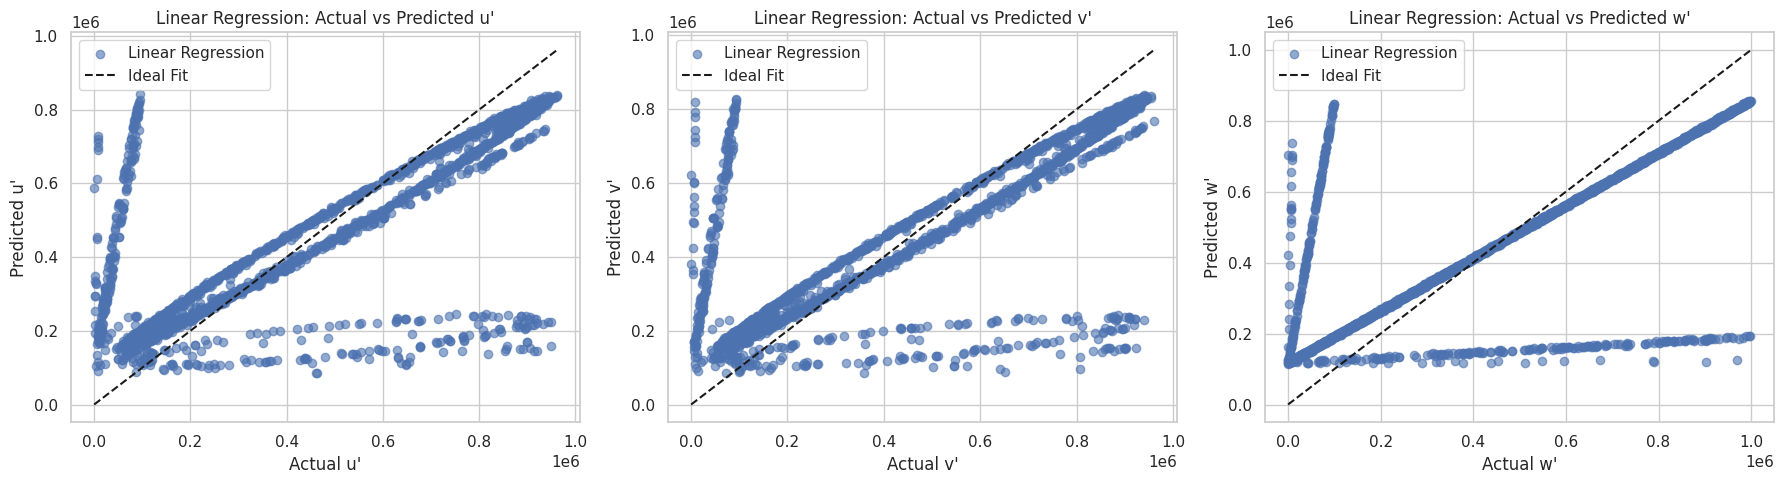

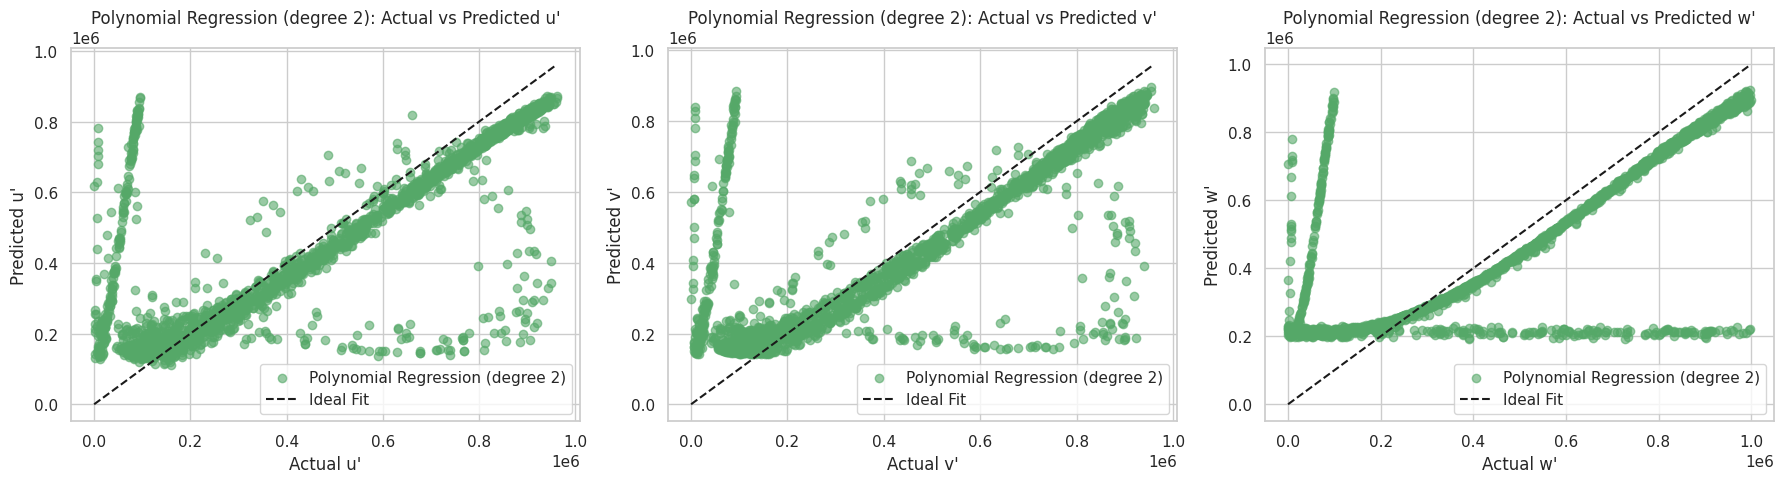

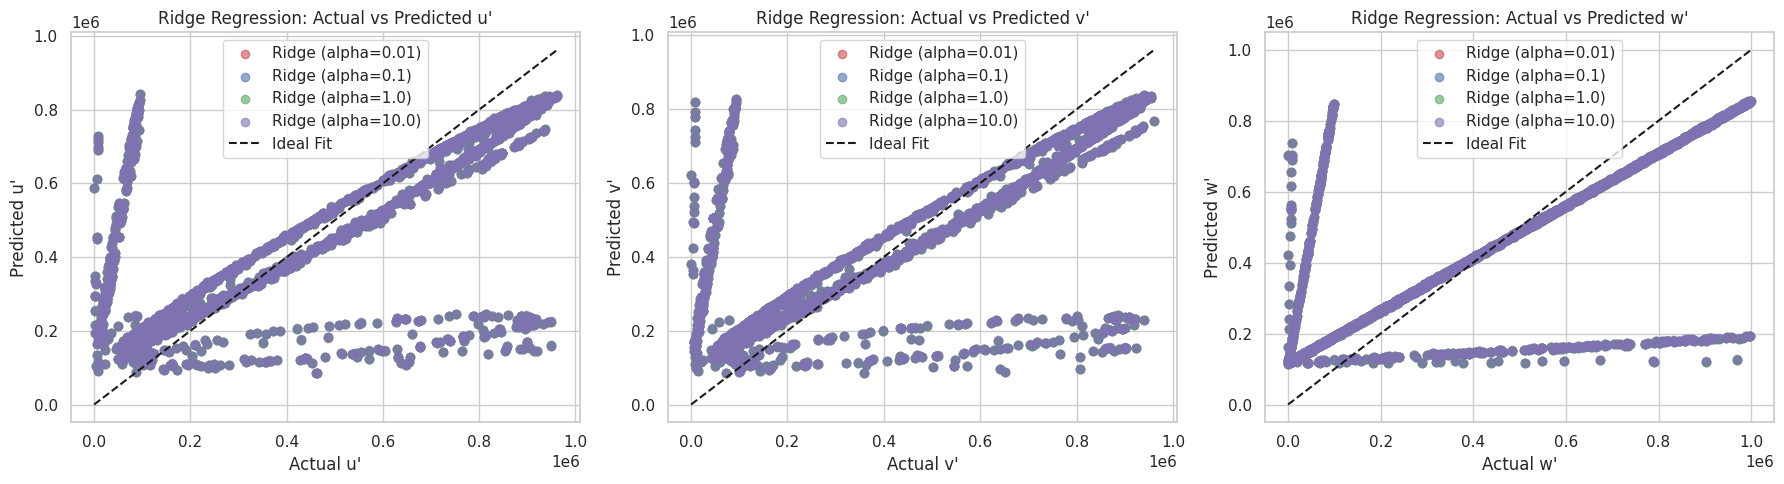

In [7]:
import matplotlib.pyplot as plt

# Visualizing predictions for Linear Regression
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
coords = ["u'", "v'", "w'"]
for i, coord in enumerate(coords):
    axes[i].scatter(y_test.iloc[:, i], y_pred_lr[:, i], alpha=0.6, color='b', label='Linear Regression')
    axes[i].plot([y_test.iloc[:, i].min(), y_test.iloc[:, i].max()],
                 [y_test.iloc[:, i].min(), y_test.iloc[:, i].max()], 'k--', label='Ideal Fit')
    axes[i].set_xlabel(f'Actual {coord}')
    axes[i].set_ylabel(f'Predicted {coord}')
    axes[i].set_title(f'Linear Regression: Actual vs Predicted {coord}')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Visualizing predictions for Polynomial Regression (degree 2)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, coord in enumerate(coords):
    y_pred_poly_2 = model_poly.predict(X_test_scaled)
    axes[i].scatter(y_test.iloc[:, i], y_pred_poly_2[:, i], alpha=0.6, color='g', label='Polynomial Regression (degree 2)')
    axes[i].plot([y_test.iloc[:, i].min(), y_test.iloc[:, i].max()],
                 [y_test.iloc[:, i].min(), y_test.iloc[:, i].max()], 'k--', label='Ideal Fit')
    axes[i].set_xlabel(f'Actual {coord}')
    axes[i].set_ylabel(f'Predicted {coord}')
    axes[i].set_title(f'Polynomial Regression (degree 2): Actual vs Predicted {coord}')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Visualizing predictions for Ridge Regression with different alpha values
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
alpha_colors = {0.01: 'r', 0.1: 'b', 1.0: 'g', 10.0: 'm'}
for i, coord in enumerate(coords):
    for alpha, color in alpha_colors.items():
        model_ridge = Ridge(alpha=alpha)
        model_ridge.fit(X_train_scaled, y_train)
        y_pred_ridge = model_ridge.predict(X_test_scaled)
        axes[i].scatter(y_test.iloc[:, i], y_pred_ridge[:, i], alpha=0.6, color=color, label=f'Ridge (alpha={alpha})')
    axes[i].plot([y_test.iloc[:, i].min(), y_test.iloc[:, i].max()],
                 [y_test.iloc[:, i].min(), y_test.iloc[:, i].max()], 'k--', label='Ideal Fit')
    axes[i].set_xlabel(f'Actual {coord}')
    axes[i].set_ylabel(f'Predicted {coord}')
    axes[i].set_title(f'Ridge Regression: Actual vs Predicted {coord}')
    axes[i].legend()

plt.tight_layout()
plt.show()


The best model is: Polynomial Regression (degree 3)


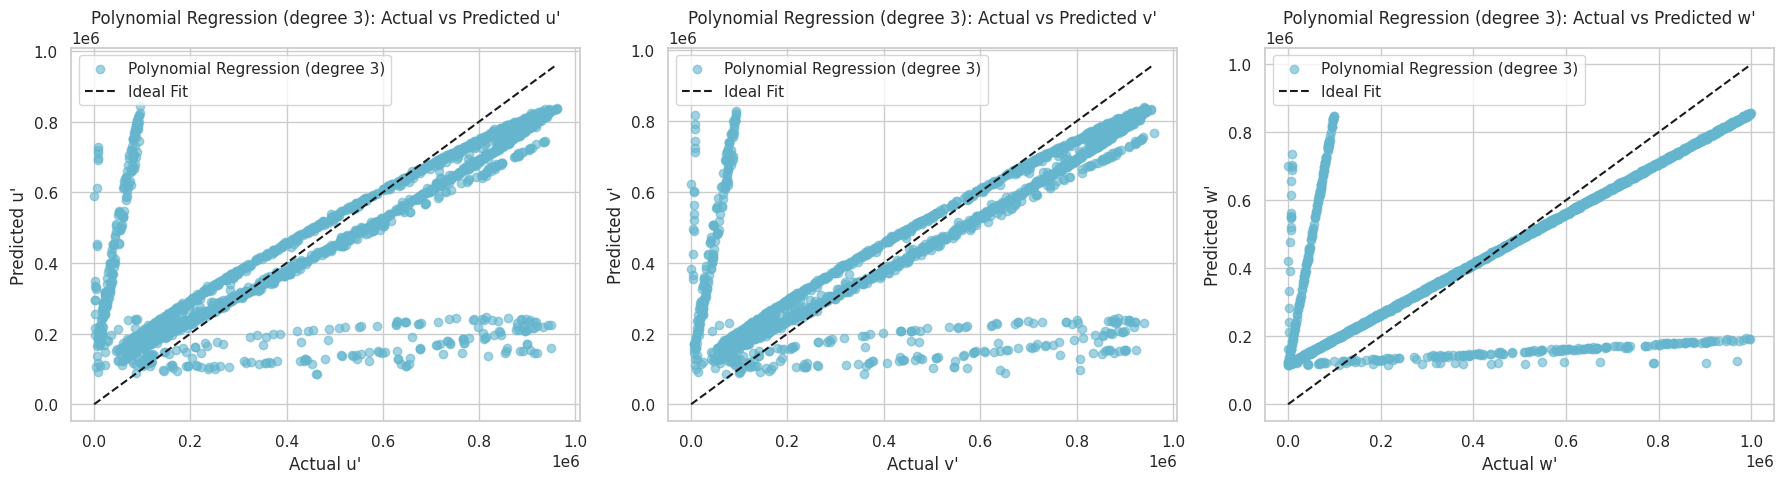

Conclusions:

1. The best model is Polynomial Regression (degree 3) with the following performance metrics:
RMSE    195321.731982
R²           0.595482
Name: Polynomial Regression (degree 3), dtype: float64

2. The model successfully maps the initial coordinates (u, v, w) to the calculated coordinates (u', v', w').
3. This predictive capability can aid in simulating structural transformations of carbon nanotubes.
4. Future work can involve incorporating more complex features or testing advanced algorithms like neural networks.


In [8]:
# Finalize the best model
best_model_name = results_df.index[0]
print(f"\nThe best model is: {best_model_name}")

# Refitting the best model
if "Pipeline" in str(type(model_lr)):  # Check if it's a pipeline (Polynomial regression)
    best_model = model_poly
    best_model.fit(X_train_scaled, y_train)
    y_pred = best_model.predict(X_test_scaled)
else:
    best_model = model_lr if best_model_name == 'Linear Regression' else \
                 Ridge(alpha=0.1) if best_model_name == 'Ridge Regression (alpha=0.1)' else model_ridge
    best_model.fit(X_train_scaled, y_train)
    y_pred = best_model.predict(X_test_scaled)

# Visualizing predictions for the best model (based on RMSE)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, coord in enumerate(coords):
    axes[i].scatter(y_test.iloc[:, i], y_pred[:, i], alpha=0.6, color='c', label=f'{best_model_name}')
    axes[i].plot([y_test.iloc[:, i].min(), y_test.iloc[:, i].max()],
                 [y_test.iloc[:, i].min(), y_test.iloc[:, i].max()], 'k--', label='Ideal Fit')
    axes[i].set_xlabel(f'Actual {coord}')
    axes[i].set_ylabel(f'Predicted {coord}')
    axes[i].set_title(f'{best_model_name}: Actual vs Predicted {coord}')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Final Conclusions
print("Conclusions:\n")
print(f"1. The best model is {best_model_name} with the following performance metrics:")
print(results_df.loc[best_model_name])
print("\n2. The model successfully maps the initial coordinates (u, v, w) to the calculated coordinates (u', v', w').")
print("3. This predictive capability can aid in simulating structural transformations of carbon nanotubes.")
print("4. Future work can involve incorporating more complex features or testing advanced algorithms like neural networks.")